In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.metrics import accuracy_score

# import custom functions from src folder
module_path = str(Path.cwd() / "../../src")

if module_path not in sys.path:
    sys.path.append(module_path)

from util import *

In [2]:
color = ["#e41a1c", "#377eb8"]

In [3]:
#Data constants

shapes_B = [2, 4]#[2, 2]
scales_B = [3, 3]
k_B = len(scales_B) # Number of classes
d_B = 2 # Number of dimensions
p_c_B = [1/len(shapes_B)]*len(shapes_B) # Uniform distributon over classes
tag_B = f'k_{k_B}_d{d_B}_shapes{shapes_B}_scales{scales_B}_pc{p_c_B}'.replace(" ", "")

trainfile_B = f"train_n_50000_{tag_B}"
testfile_B = f"test_n_10000_{tag_B}"
gridfile_B = f"grid_x1_x2_10000_{tag_B}"
large_gridfile_B = f"grid_r_a1_2500_{tag_B}"
test_data_B = pd.read_csv(f"data/{testfile_B}.csv")
grid_data_B = pd.read_csv(f"data/{gridfile_B}.csv")
large_grid_data_B = pd.read_csv(f"data/{large_gridfile_B}.csv")
train_data_B = pd.read_csv(f"data/{trainfile_B}.csv")
grid_xmax_B = grid_data_B["x1"].max()
large_grid_rmax_B = large_grid_data_B["r"].max()

shapes_A = [2, 6]#[2, 2]
scales_A = [5, 3]
k_A = len(scales_A) # Number of classes
d_A = 2 # Number of dimensions
p_c_A = [1/len(shapes_A)]*len(shapes_A) # Uniform distributon over classes
tag_A = f'k_{k_A}_d{d_A}_shapes{shapes_A}_scales{scales_A}_pc{p_c_A}'.replace(" ", "")

trainfile_A = f"train_n_50000_{tag_A}"
testfile_A = f"test_n_10000_{tag_A}"
gridfile_A = f"grid_x1_x2_10000_{tag_A}"
large_gridfile_A = f"grid_r_a1_2500_{tag_A}"
test_data_A = pd.read_csv(f"data/{testfile_A}.csv")
grid_data_A = pd.read_csv(f"data/{gridfile_A}.csv")
large_grid_data_A = pd.read_csv(f"data/{large_gridfile_A}.csv")
train_data_A = pd.read_csv(f"data/{trainfile_A}.csv")
grid_xmax_A = grid_data_A["x1"].max()
large_grid_rmax_A = large_grid_data_A["r"].max()

# Same for both data sets
n_train = [250, 500, 1000, 2000, 3000, 5000]
n_plots = len(n_train)

max_err_val = [0]*n_plots
for i in range(n_plots):
    if n_train[i] < 1000:
        max_err_val[i] = 0.3
    else:
        max_err_val[i] = 0.3


### Dataset A

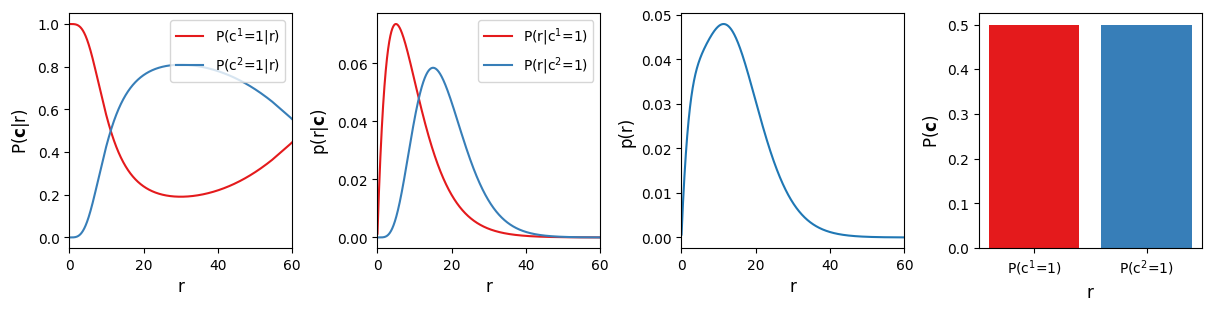

In [4]:
fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize = (12, 3), layout="constrained")
for i in range(k_A):
    sn.lineplot(train_data_A, x="r", y=f"p_c{i}_given_r", label=rf"P(c$^{i+1}$=1|r)", ax=axs[0], c=color[i])
    axs[0].set_ylabel(r"P($\mathbf{c}$|r)", fontsize=12)
    axs[0].legend(loc="upper right")
    sn.lineplot(train_data_A, x="r", y=f"p_r_given_c{i}", label=f"P(r|c$^{i+1}$=1)", ax=axs[1], c=color[i])
    axs[1].set_ylabel(r"p(r|$\mathbf{c}$)", fontsize=12)
    axs[1].legend(loc="upper right")
    axs[3].bar(x=[rf"P(c$^{i+1}$=1)" for i in range(k_A)], height=p_c_A, color=color)
    axs[3].set_ylabel(r"P($\mathbf{c}$)", fontsize=12)

sn.lineplot(train_data_A, x="r", y="p_r", ax=axs[2])
axs[2].set_ylabel("p(r)", fontsize=12)
axs[0].set_xlim(0, 60)
axs[1].set_xlim(0, 60)
axs[2].set_xlim(0, 60)
for ax in axs:
    ax.set_xlabel("r", fontsize=12)
fig.savefig(f"fig/data_{tag_A}.pdf", format="pdf", bbox_inches='tight', dpi=350)

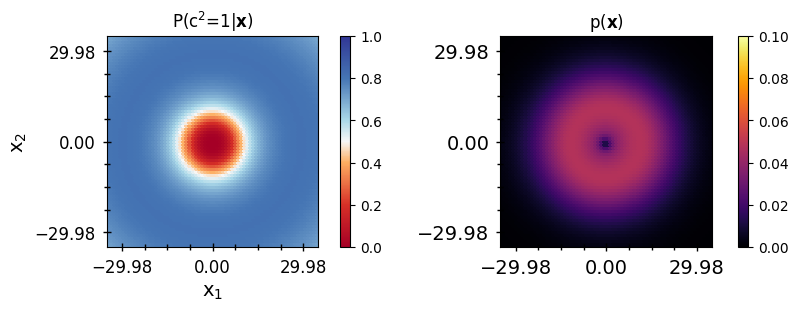

In [5]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (8,3), layout="constrained")
axs[0] = plot_results(grid_data_A, "p_c1_given_r", axs[0], r"P(c$^2$=1|$\mathbf{x}$)", grid=True, rmax=grid_xmax_B)
hue_norm = mpl.colors.Normalize(vmin=0, vmax=1, clip=False)
fig.colorbar(mpl.cm.ScalarMappable(norm=hue_norm, cmap=red_blue_cmap()), fraction=0.050, pad=0.04, ax=axs[0])

axs[1] = plot_std(grid_data_A, "p_r", axs[1], r"p($\mathbf{x}$)", grid=True, max_val = 0.1, rmax=grid_xmax_B)
hue_norm = mpl.colors.Normalize(vmin=0, vmax=0.1, clip=False)
fig.colorbar(mpl.cm.ScalarMappable(norm=hue_norm, cmap="inferno"), fraction=0.050, pad=0.04, ax=axs[1])

#fig.savefig(f"../fig/DNN_ensemble_ntrain_{n_data[i]}.pdf", format="pdf", bbox_inches='tight', dpi=350)

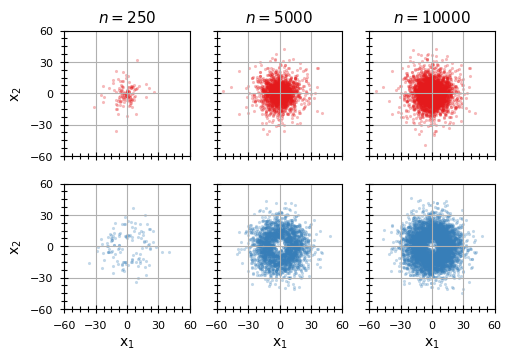

In [6]:
def plot_training_data(df, ntrain, class_label, class_color, ax):
    df_small = df[0:ntrain][df[0:ntrain]["class"]==class_label]
    sn.scatterplot(df_small, x="x1", y="x2", color=class_color, ax=ax, s=5, linewidth=0, alpha=0.3)
    #ax.set_title(rf"$n={ntrain}$", fontsize=11)
    return ax

fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (5,3.5), layout="constrained", sharex=True, sharey=True)

axs[0][0] = plot_training_data(train_data_A, 250, 0, color[0], axs[0][0])
axs[0][1] = plot_training_data(train_data_A, 5000, 0, color[0], axs[0][1])
axs[0][2] = plot_training_data(train_data_A, 10000, 0, color[0], axs[0][2])
axs[1][0] = plot_training_data(train_data_A, 250, 1, color[1], axs[1][0])
axs[1][1] = plot_training_data(train_data_A, 5000, 1, color[1], axs[1][1])
axs[1][2] = plot_training_data(train_data_A, 10000, 1, color[1], axs[1][2])

axs[0][0].set_title(rf"$n=250$", fontsize=11)
axs[0][1].set_title(rf"$n=5000$", fontsize=11)
axs[0][2].set_title(rf"$n=10000$", fontsize=11)

for ax in axs.flatten():
    ax.tick_params(which="both", direction="inout", bottom=True, left=True, labelsize=8, pad=5, length=4, width=0.8)
    ax.tick_params(which="major", length=6)
    ax.set_xticks([-60, -30, 0, 30, 60])
    ax.set_yticks([-60, -30, 0, 30, 60])
    ax.set_xlabel(r"x$_1$", fontsize=10)
    ax.set_ylabel(r"x$_2$", fontsize=10)
    ax.set_aspect('equal', adjustable='box')
    ax.minorticks_on()
    ax.grid()

#fig.savefig(f"../fig/DNN_ensemble_ntrain_{n_data[i]}.pdf", format="pdf", bbox_inches='tight', dpi=350)

In [7]:
# Expected accuracy on any test set sampled from this distribution
exp_acc_A = np.sum(test_data_A[[f"p_c{i}_given_r" for i in range(k_B)]].max(axis=1))/len(test_data_A)
# But in our case, we will see the actual accuracy on this test set compared to expectation
test_data_A["Expected class"] = np.array(test_data_A[[f"p_c{i}_given_r" for i in range(k_A)]]).argmax(axis=-1)
max_acc_A = accuracy_score(test_data_A["class"], test_data_A["Expected class"], normalize=True)
max_acc_A_small = accuracy_score(test_data_A["class"][0:500], test_data_A["Expected class"][0:500], normalize=True)

print("Expected accuray: ", exp_acc_A, "Max optimal accuracy test set: ", max_acc_A, "Max optimal accuracy small test set: ", max_acc_A_small)

Expected accuray:  0.7385207198110306 Max optimal accuracy test set:  0.7439 Max optimal accuracy small test set:  0.736


### Data set B

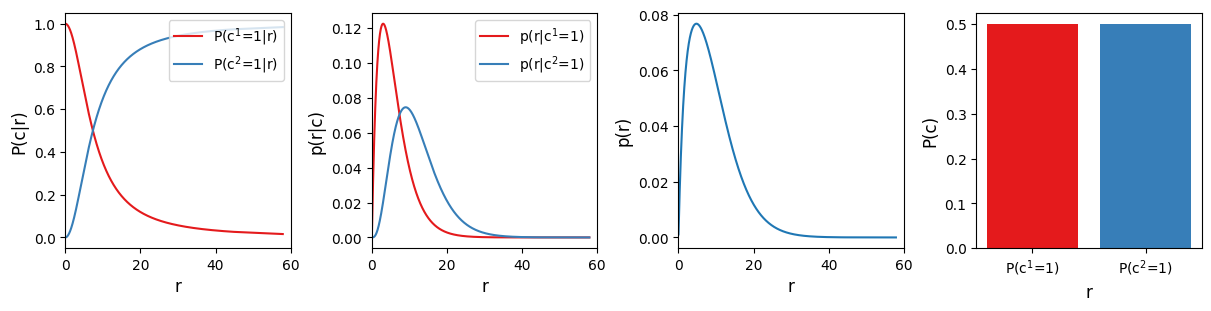

In [8]:
fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize = (12, 3), layout="constrained")
for i in range(k_B):
    sn.lineplot(train_data_B, x="r", y=f"p_c{i}_given_r", label=rf"P(c$^{i+1}$=1|r)", ax=axs[0], c=color[i])
    axs[0].set_ylabel(r"P(c|r)", fontsize=12)
    axs[0].legend(loc="upper right")
    sn.lineplot(train_data_B, x="r", y=f"p_r_given_c{i}", label=rf"p(r|c$^{i+1}$=1)", ax=axs[1], c=color[i])
    axs[1].set_ylabel(r"p(r|c)", fontsize=12)
    axs[1].legend(loc="upper right")
    axs[3].bar(x=[f"P(c$^{i+1}$=1)" for i in range(k_B)], height=p_c_B, color=color)
    axs[3].set_ylabel(f"P(c)", fontsize=12)

sn.lineplot(train_data_B, x="r", y="p_r", ax=axs[2])
axs[2].set_ylabel("p(r)", fontsize=12)
axs[0].set_xlim(0, 60)
axs[1].set_xlim(0, 60)
axs[2].set_xlim(0, 60)
for ax in axs:
    ax.set_xlabel("r", fontsize=12)
    #ax.set_xlim(0, 60)
fig.savefig(f"fig/data_{tag_B}.pdf", format="pdf", bbox_inches='tight', dpi=350)

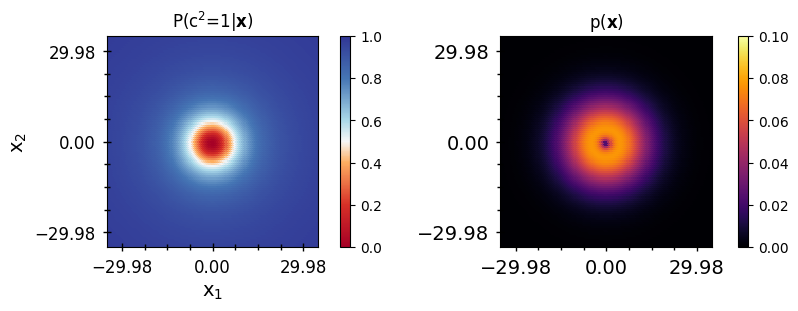

In [9]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (8,3), layout="constrained")
axs[0] = plot_results(grid_data_B, "p_c1_given_r", axs[0], r"P(c$^2$=1|$\mathbf{x}$)", grid=True, rmax=grid_xmax_B)
hue_norm = mpl.colors.Normalize(vmin=0, vmax=1, clip=False)
fig.colorbar(mpl.cm.ScalarMappable(norm=hue_norm, cmap=red_blue_cmap()), fraction=0.050, pad=0.04, ax=axs[0])

axs[1] = plot_std(grid_data_B, "p_r", axs[1], r"p($\mathbf{x}$)", grid=True, max_val = 0.1, rmax=grid_xmax_B)
hue_norm = mpl.colors.Normalize(vmin=0, vmax=0.1, clip=False)
fig.colorbar(mpl.cm.ScalarMappable(norm=hue_norm, cmap="inferno"), fraction=0.050, pad=0.04, ax=axs[1])

#fig.savefig(f"../fig/DNN_ensemble_ntrain_{n_data[i]}.pdf", format="pdf", bbox_inches='tight', dpi=350)

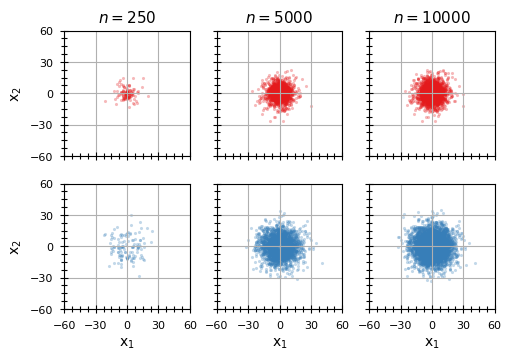

In [10]:
def plot_training_data(df, ntrain, class_label, class_color, ax):
    df_small = df[0:ntrain][df[0:ntrain]["class"]==class_label]
    sn.scatterplot(df_small, x="x1", y="x2", color=class_color, ax=ax, s=5, linewidth=0, alpha=0.3)
    #ax.set_title(rf"$n={ntrain}$", fontsize=11)
    return ax

fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (5,3.5), layout="constrained", sharex=True, sharey=True)

axs[0][0] = plot_training_data(train_data_B, 250, 0, color[0], axs[0][0])
axs[0][1] = plot_training_data(train_data_B, 5000, 0, color[0], axs[0][1])
axs[0][2] = plot_training_data(train_data_B, 10000, 0, color[0], axs[0][2])
axs[1][0] = plot_training_data(train_data_B, 250, 1, color[1], axs[1][0])
axs[1][1] = plot_training_data(train_data_B, 5000, 1, color[1], axs[1][1])
axs[1][2] = plot_training_data(train_data_B, 10000, 1, color[1], axs[1][2])

axs[0][0].set_title(rf"$n=250$", fontsize=11)
axs[0][1].set_title(rf"$n=5000$", fontsize=11)
axs[0][2].set_title(rf"$n=10000$", fontsize=11)

for ax in axs.flatten():
    ax.tick_params(which="both", direction="inout", bottom=True, left=True, labelsize=8, pad=5, length=4, width=0.8)
    ax.tick_params(which="major", length=6)
    ax.set_xticks([-60, -30, 0, 30, 60])
    ax.set_yticks([-60, -30, 0, 30, 60])
    ax.set_xlabel(r"x$_1$", fontsize=10)
    ax.set_ylabel(r"x$_2$", fontsize=10)
    ax.set_aspect('equal', adjustable='box')
    ax.minorticks_on()
    ax.grid()

#fig.savefig(f"../fig/DNN_ensemble_ntrain_{n_data[i]}.pdf", format="pdf", bbox_inches='tight', dpi=350)

In [11]:
# Expected accuracy on any test set sampled from this distribution
exp_acc_B = np.sum(test_data_B[[f"p_c{i}_given_r" for i in range(k_B)]].max(axis=1))/len(test_data_B)
# But in our case, we will see the actual accuracy on this test set compared to expectation
test_data_B["Expected class"] = np.array(test_data_B[[f"p_c{i}_given_r" for i in range(k_B)]]).argmax(axis=-1)
max_acc_B = accuracy_score(test_data_B["class"], test_data_B["Expected class"], normalize=True)
max_acc_B_small = accuracy_score(test_data_B["class"][0:500], test_data_B["Expected class"][0:500], normalize=True)

print("Expected accuray: ", exp_acc_B, ", Max optimal accuracy test set: ", max_acc_B, ", Max optimal accuracy small test set: ", max_acc_B_small)

Expected accuray:  0.7347306433676738 , Max optimal accuracy test set:  0.7367 , Max optimal accuracy small test set:  0.728


### Get results

In [23]:

model_names = ["NNE", 
               "CL",
               "EDL",
               "MCD", 
               "GP", 
               "DPMM"]
pred_keys = ["Prediction", 
             "Prediction",
             "Prediction", 
             "Prediction", 
             "Prediction", 
             "Inferred_class"]
prob_keys = ["Est_prob_c1", 
             "Est_prob_c1", 
             "Est_prob_c1", 
             "Est_prob_c1", 
             "Est_prob_c1_MC", 
             "Est_prob_c1"]
std_keys = ["Std_prob_c1", 
            "Std_prob_c1",
            "Std_prob_c1",
            "Std_prob_c1", 
            "Std_prob_c1_MC", 
            "Std_samples_c1"]


n_models = len(model_names)

def get_dfs(tag, n_train, n_models):
    def get_filename_list(prefix, tag):
        files = [
            [f"DNN/predictions/train_n_50000_{tag}/ensemble/{prefix}_{tag}_ndata-{n}.csv" for n in n_train],
            [f"DNN/predictions/train_n_50000_{tag}/CL/{prefix}_{tag}_ndata-{n}.csv" for n in n_train],
            [f"DNN/predictions/train_n_50000_{tag}/evidential/{prefix}_{tag}_ndata-{n}.csv" for n in n_train],
            [f"DNN/predictions/train_n_50000_{tag}/MCD/{prefix}_{tag}_ndata-{n}.csv" for n in n_train],
            [f"gaussian_process/predictions/train_n_50000_{tag}/{prefix}_{tag}_predicted_latentGP_2_ls8_ndata-{n}.csv" for n in n_train],
            [f"inferno/predictions/train_n_50000_{tag}/{prefix}_{tag}_predicted_MM_ndata-{n}.csv" for n in n_train]
        ]
        return files
    gridfiles = get_filename_list("grid", tag)
    large_gridfiles = get_filename_list("large_grid", tag)
    testfiles = get_filename_list("test_n_10000", tag)
    
    grid_dfs = [[pd.read_csv(gridfiles[i][j]) for j in range(n_plots)]for i in range(len(n_train))]
    large_grid_dfs = [[pd.read_csv(large_gridfiles[i][j]) for j in range(n_plots)]for i in range(len(n_train))]
    test_dfs = [[pd.read_csv(testfiles[i][j]) for j in range(n_plots)]for i in range(len(n_train))]
    return grid_dfs, large_grid_dfs, test_dfs

grid_dfs_A, large_grid_dfs_A, test_dfs_A = get_dfs(tag_A, n_train, n_models)
#grid_dfs_B, large_dfs_B, test_dfs_B = get_dfs(tag_B, n_train, n_plots, n_models)

### Metrics

In [13]:
def get_metrics(test_dfs, n_train, test_data, n_max=-1):
    scores = [calculate_metrics(test_dfs[i], n_train, test_data, 
                           pred_keys[i], prob_keys[i], std_keys[i], n_max=n_max) for i in range(n_models)]
    keys = ["N data", "ACC", "ROCAUC", "LogLoss", "Mean KL-div test", "ECE", "WD test"]
    best_score = pd.DataFrame(columns=keys)
    best_score["N data"] = n_train
    
    # Get average top level confidence
    for j in range (n_models):
        scores[j]["Q avg"] = 0.0
        scores[j]["Z"] = 0.0
        for i in range(n_plots):
            mask = test_dfs[j][i][prob_keys[j]] < 0.5
            test_dfs[j][i]["Top level confidence"] = test_dfs[j][i][prob_keys[j]]
            test_dfs[j][i].loc[mask, "Top level confidence"] = 1 - test_dfs[j][i][prob_keys[j]]
        scores[j]["Q avg"] = [test_dfs[j][i]["Top level confidence"].mean() for i in range(n_plots)]
        scores[j]["Z"] = np.abs(scores[j]["Q avg"] - scores[j]["ACC"])

    for i in range(n_plots):
        #Metrics that should be maximized
        for key in (["ACC", "ROCAUC"]):
            best_score.loc[i, key] = np.argmax([scores[j][key][i] for j in range(n_models)])
        for key in (["LogLoss", "Mean KL-div test", "ECE", "WD test", "Q-P dist"]):
            best_score.loc[i, key] = np.argmin([scores[j][key][i] for j in range(n_models)])
        best_score.loc[i, "Z"] = int(np.argmin([scores[j]["Z"][i] for j in range(n_models)]))

    return scores, best_score

scores_A, best_score_A = get_metrics(test_dfs_A, n_train, test_data_A)
scores_A_small, best_score_A_small = get_metrics(test_dfs_A, n_train, test_data_A, n_max=500)

#scores_B, best_score_B = get_metrics(test_dfs_B, grid_dfs_B, n_train, grid_data_B, test_data_B)
#scores_B_small, best_score_B_small = get_metrics(test_dfs_B, grid_dfs_B, n_train, grid_data_B, test_data_B, n_max=500)

In [ ]:
test_dfs_A[0][0]

Unnamed: 0  class          r        a1         x1         x2  p_c0  \
0              0      0   4.289633  4.245334  -1.931443  -3.830206   0.5   
1              1      0  17.423602  4.247328  -7.814084 -15.573118   0.5   
2              2      1  17.497000  5.495961  12.349632 -12.394821   0.5   
3              3      1  18.340633  0.669942  14.376446  11.388443   0.5   
4              4      1  17.734816  4.248409  -7.936523 -15.859865   0.5   
...          ...    ...        ...       ...        ...        ...   ...   
9995        9995      0   3.222224  2.580172  -2.727611   1.715478   0.5   
9996        9996      1  16.659278  0.202857  16.317679   3.356321   0.5   
9997        9997      1  18.598490  0.671747  14.557703  11.574849   0.5   
9998        9998      0   6.518083  6.116791   6.428058  -1.079573   0.5   
9999        9999      1  12.773676  1.753323  -2.318617  12.561481   0.5   

      p_r_given_c0  p_c0_given_r  p_c1  ...  Prediction_8  Confidence_8  \
0         0.072759      0.948213   0.5  ...             0      0.003419   
1         0.021370      0.279314   0.5  ...             0      0.496604   
2         0.021147      0.277902   0.5  ...             1      0.981154   
3         0.018725      0.262935   0.5  ...             1      0.918194   
4         0.020439      0.273450   0.5  ...             1      0.508748   
...            ...           ...   ...  ...           ...           ...   
9995      0.067661      0.980346   0.5  ...             0      0.001126   
9996      0.023807      0.295183   0.5  ...             1      0.647030   
9997      0.018034      0.258796   0.5  ...             1      0.924476   
9998      0.070799      0.822159   0.5  ...             0      0.007242   
9999      0.039707      0.419190   0.5  ...             1      0.624041   

      Logits0_9  Logits1_9  Prediction_9  Confidence_9  Confidence_avg  \
0      3.795342  -3.461749             0      0.000705        0.002420   
1     -0.560603  -0.159577             1      0.598934        0.502084   
2     -2.241945   2.180430             1      0.988137        0.968653   
3     -1.594890   2.075517             1      0.975166        0.930111   
4     -0.589208  -0.149519             1      0.608185        0.511996   
...         ...        ...           ...           ...             ...   
9995   3.709072  -3.357230             0      0.000853        0.001547   
9996   0.033970   0.690169             1      0.658406        0.629911   
9997  -1.633998   2.120954             1      0.977133        0.934223   
9998   2.884859  -2.460257             0      0.004749        0.007448   
9999  -0.363461   0.129741             1      0.620860        0.617226   

      Confidence_std  Prediction_ensemble  Top level confidence  
0           0.002620                    0              0.997580  
1           0.105131                    1              0.502084  
2           0.019242                    1              0.968653  
3           0.084631                    1              0.930111  
4           0.102637                    1              0.511996  
...              ...                  ...                   ...  
9995        0.001622                    0              0.998453  
9996        0.092563                    1              0.629911  
9997        0.081054                    1              0.934223  
9998        0.003649                    0              0.992552  
9999        0.081517                    1              0.617226  

[10000 rows x 57 columns]

In [14]:
def grid_plots(grid_dfs, grid_data, grid_xmax, dataset_name:str):
    # A horrible function which uses global variables because I am too lazy

    for i in range(n_plots):
        fig, axs = plt.subplots(nrows = 3, ncols = n_models, figsize = (1.7*n_models,1.7*3), layout="constrained", sharey=True, sharex=True)
        for j in range(n_models):
            axs[0][j] = plot_results(grid_dfs[j][i], prob_keys[j], axs[0][j], "", grid=True, rmax=grid_xmax)
            axs[1][j] = plot_diff(grid_dfs[j][i], grid_data, prob_keys[j], "p_c1_given_r",  axs[1][j], r"", max_val=max_err_val[-1], rmax=grid_xmax, absolute=True)
            axs[2][j] = plot_std(grid_dfs[j][i], std_keys[j], axs[2][j], r"", grid=True, max_val=max_err_val[-1], rmax=grid_xmax)
            axs[0][j].set_title(model_names[j])

        for ax in axs.flatten():
            ax.tick_params(labelsize=10, bottom=True, left=True, top=False, right=False)
        hue_norm_prob = mpl.colors.Normalize(vmin=0, vmax=1, clip=False)
        fig.colorbar(mpl.cm.ScalarMappable(norm=hue_norm_prob, cmap=red_blue_cmap()),  fraction=0.050, pad=0.04,
                    label=r"Q(c|$\mathbf{x}$)", ax=axs[0][-1])
        
        hue_norm_std = mpl.colors.Normalize(vmin=0, vmax=max_err_val[-1], clip=False)
        fig.colorbar(mpl.cm.ScalarMappable(norm=hue_norm_std, cmap="inferno"),  fraction=0.050, pad=0.04,
                    label=r"|Q(c|$\mathbf{x}$)-P(c|$\mathbf{x}$)|", ax=axs[1][-1])
        
        hue_norm_err = mpl.colors.Normalize(vmin=0, vmax=max_err_val[-1], clip=False)
        fig.colorbar(mpl.cm.ScalarMappable(norm=hue_norm_err, cmap="inferno"),  fraction=0.050, pad=0.04,
                    label=r"$u_Q$(c|$\mathbf{x}$)", ax=axs[2][-1])
        fig.suptitle(f"Number of training data points: {n_train[i]}", fontsize=16)
        fig.savefig(f"fig/results_{dataset_name}_grid_{n_train[i]}.pdf", format="pdf", bbox_inches='tight', dpi=350)


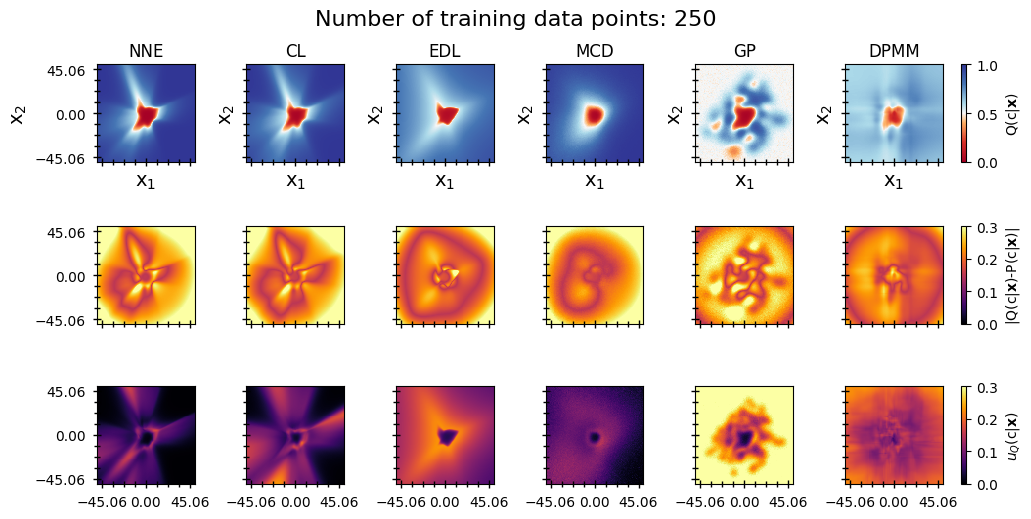

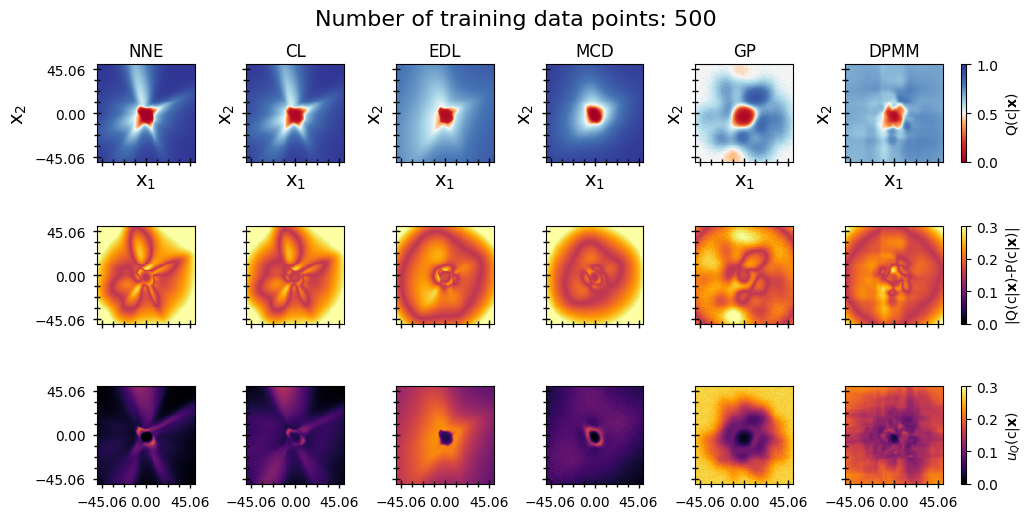

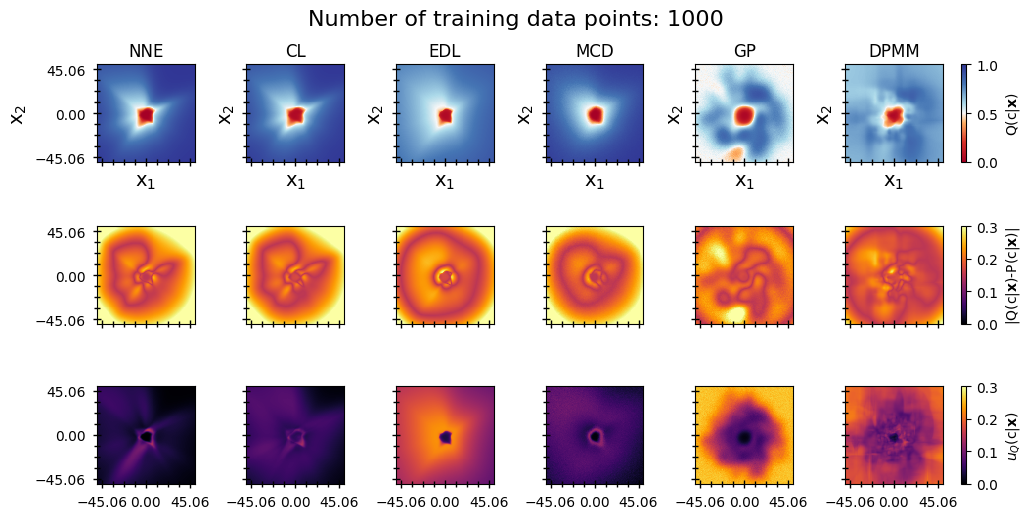

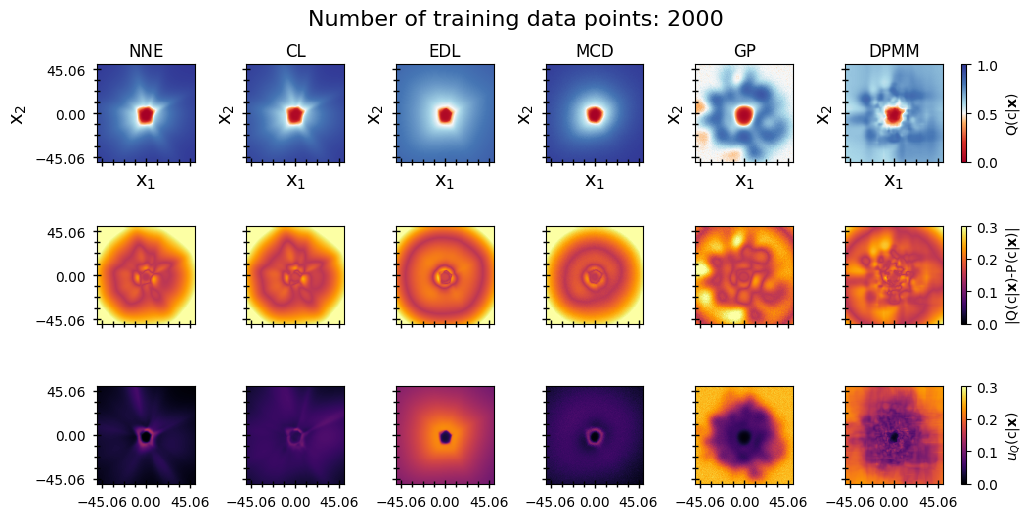

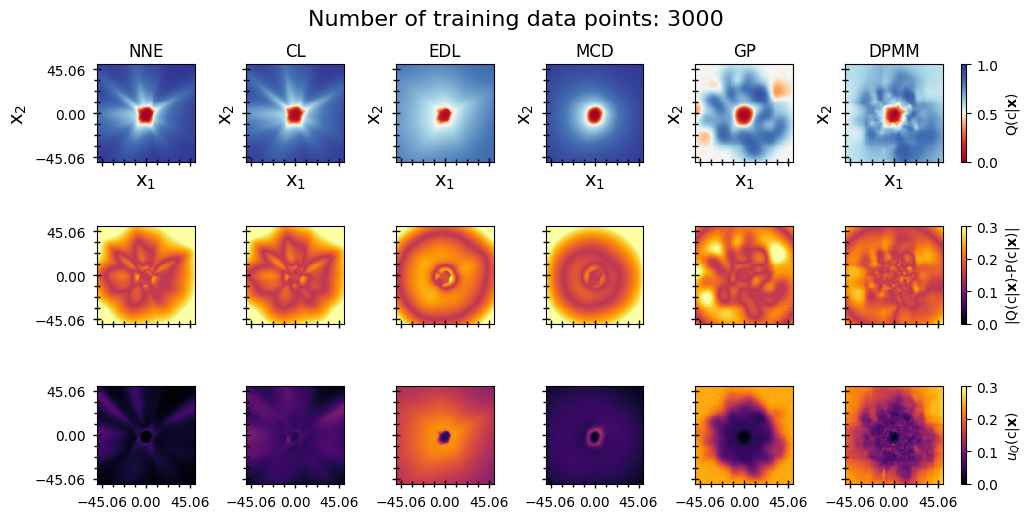

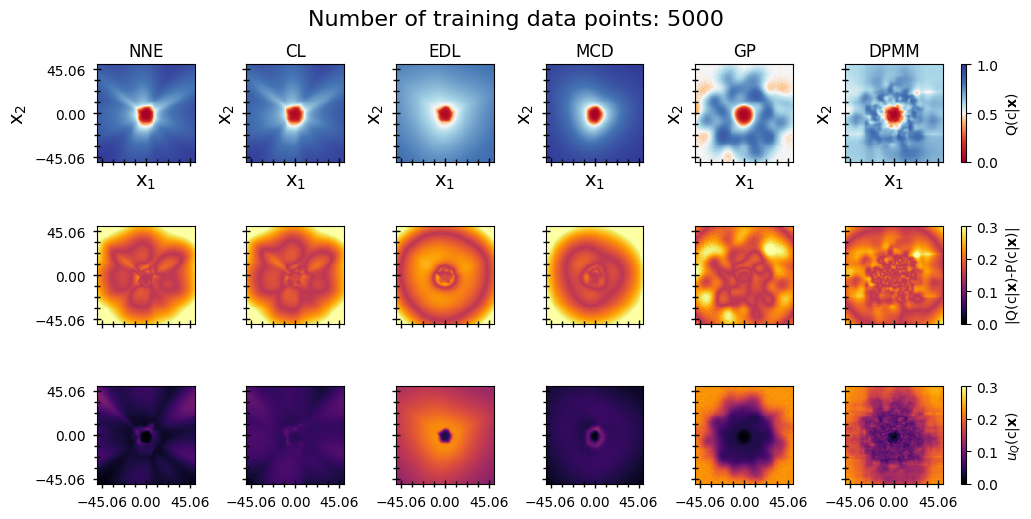

In [15]:
grid_plots(grid_dfs_A, grid_data_A, grid_xmax_A, "datasetA")

In [ ]:
#grid_plots(grid_dfs_B, grid_data_B, grid_xmax_B, "datasetB")

In [24]:
def r_plots(dfs, truth, rmax, shapes, scales, n_train, color_palette, dataset_name:str, grid=False):
    # A horrible function which uses global variables because I am too lazy
    for i in range(n_plots):
        # Add posteriors for flat priors

        fig, axs = plt.subplots(nrows = 2, ncols = n_models, figsize = (2*n_models,3.5), layout="constrained", sharex=True, sharey="row")
        hue_norm_prob = mpl.colors.Normalize(vmin=0, vmax=2*np.pi, clip=False)
        for j in range(n_models):
            # Plot expected probability
            sn.scatterplot(dfs[j][i], x="r", y=f"{prob_keys[j]}", s=5, ax = axs[0][j], hue="a1", 
                    hue_norm = hue_norm_prob, palette=color_palette,
                    legend=False, linewidth=0)
            
            if grid:
                sn.lineplot(truth[truth["a1"]==0], x="r", y="p_c1_given_r", linewidth=2, ax = axs[0][j], label=r"P(c|$\mathbf{x}$)", c="#ff7f00", legend=False)
            else:
                sn.lineplot(truth, x="r", y="p_c1_given_r", linewidth=2, ax = axs[0][j], label=r"P(c|$\mathbf{x}$)", c="#ff7f00", legend=False)
            
            axs[0][j].set_ylabel(r"Q(c|$\mathbf{x}$)", fontsize=12)
            axs[0][j].set_ylim(-0.1, 1.1)

            # Plot uncertainty
            sn.scatterplot(dfs[j][i], x="r", y=f"{std_keys[j]}", s=5, ax = axs[1][j], hue="a1", 
                    hue_norm = hue_norm_prob, palette=color_palette, #hsv
                    legend=False, linewidth=0)
            axs[1][j].set_ylabel(r"u$_Q$(c|$\mathbf{x}$)", fontsize=12)
            axs[1][j].set_ylim(0, 0.4)
            axs[0][j].set_title(model_names[j], fontsize=14)
        
        axs[0][0].legend(loc="lower right")
        fig.colorbar(mpl.cm.ScalarMappable(norm=hue_norm_prob, cmap=color_palette),  fraction=0.050, pad=0.04,
                    label=r"$\theta_x$", ax=axs[0][-1])
        fig.colorbar(mpl.cm.ScalarMappable(norm=hue_norm_prob, cmap=color_palette),  fraction=0.050, pad=0.04,
                    label=r"$\theta_x$", ax=axs[1][-1])
        axs[0][0].set_xlabel(r"$r_x$")

        for ax in axs.flatten():
            ax.set_xlim(0, rmax+5)
            ax.grid(True)

        if grid:
            fig.savefig(f"fig/results_{dataset_name}_r_axis_extrapolate_{n_train[i]}.png", format="png", bbox_inches='tight', dpi=350)
        else:
            fig.savefig(f"fig/results_{dataset_name}_r_axis_{n_train[i]}.png", format="png", bbox_inches='tight', dpi=350)


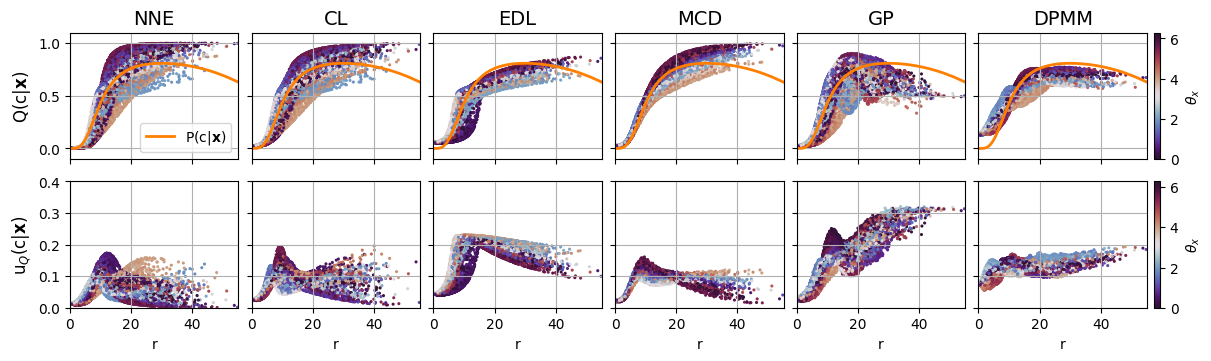

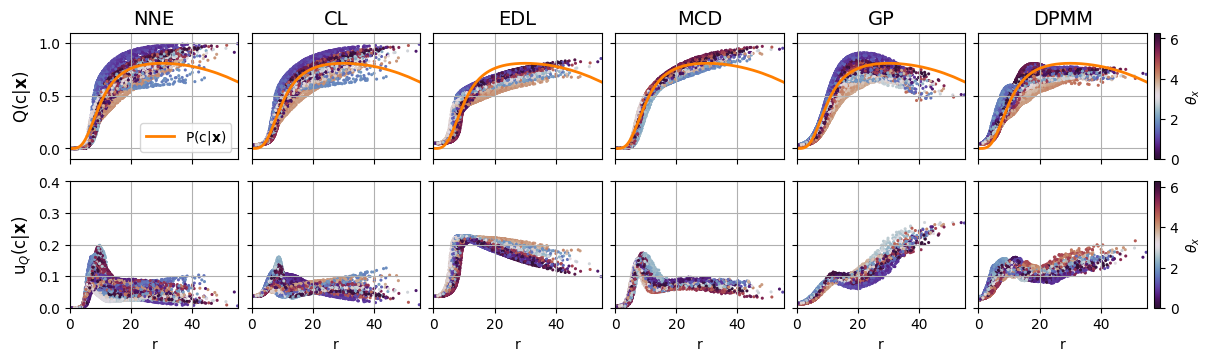

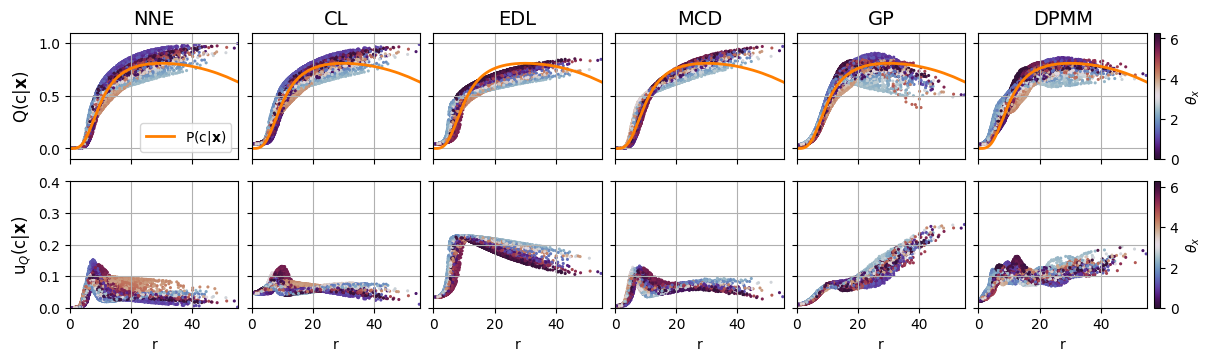

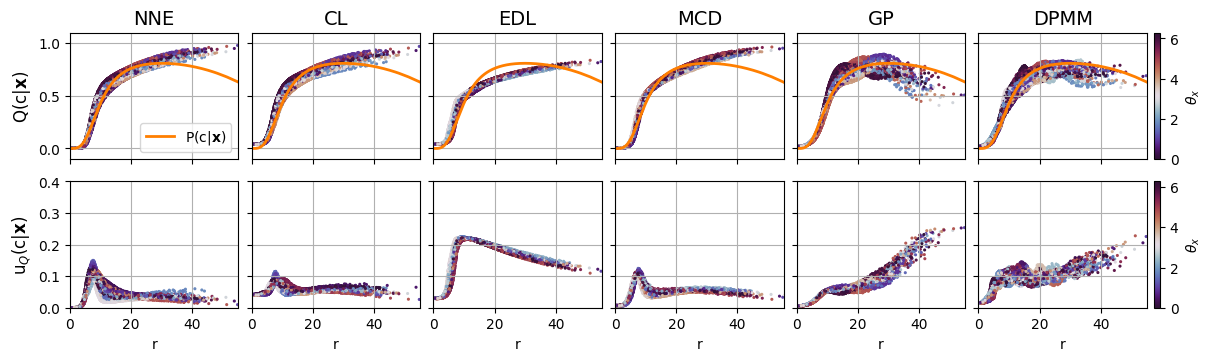

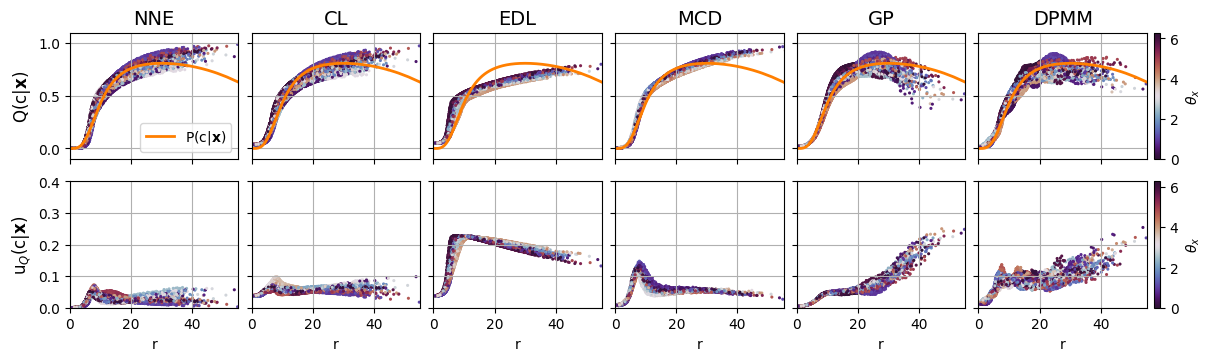

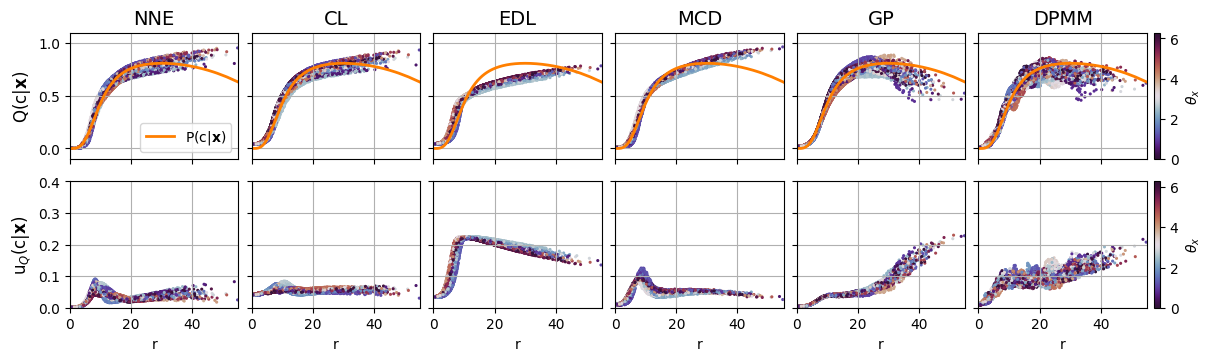

In [22]:
r_plots(test_dfs_A, test_data_A, grid_xmax_A, shapes_A, scales_A, n_train, 
        color_palette="twilight_shifted", dataset_name="datasetA")

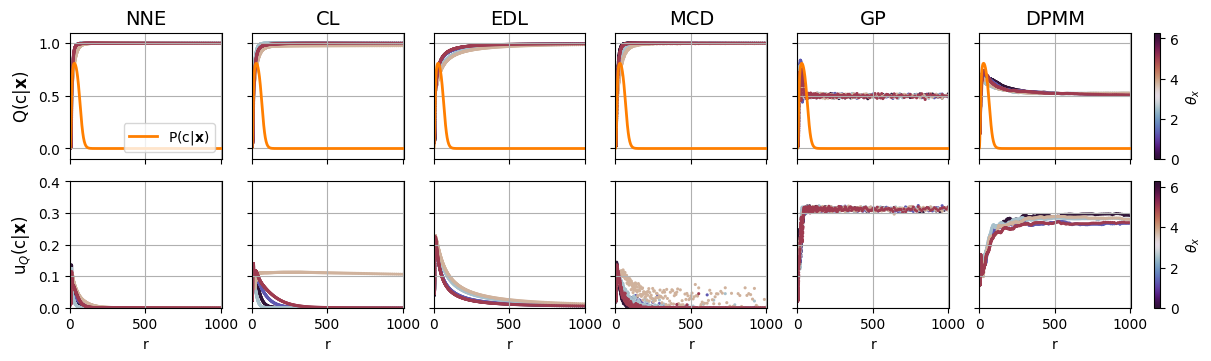

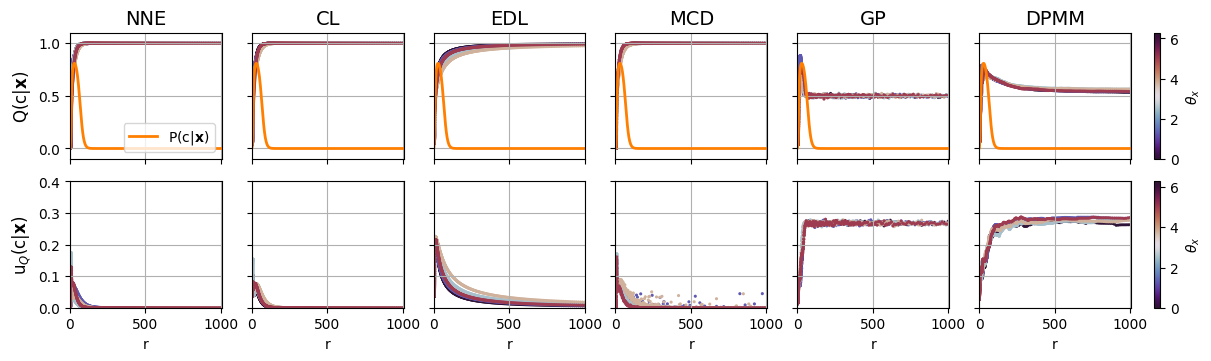

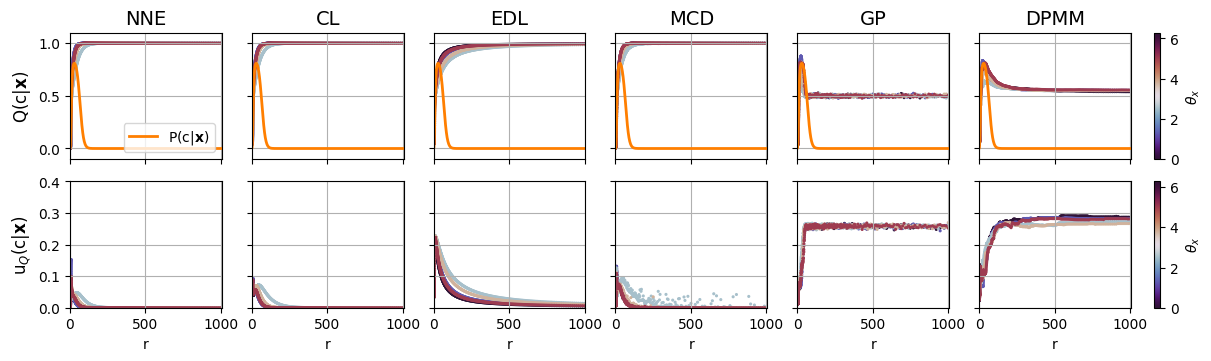

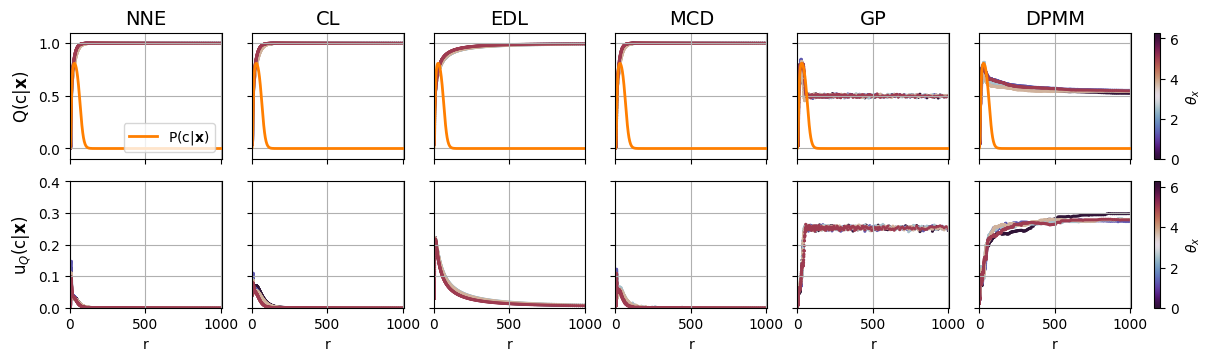

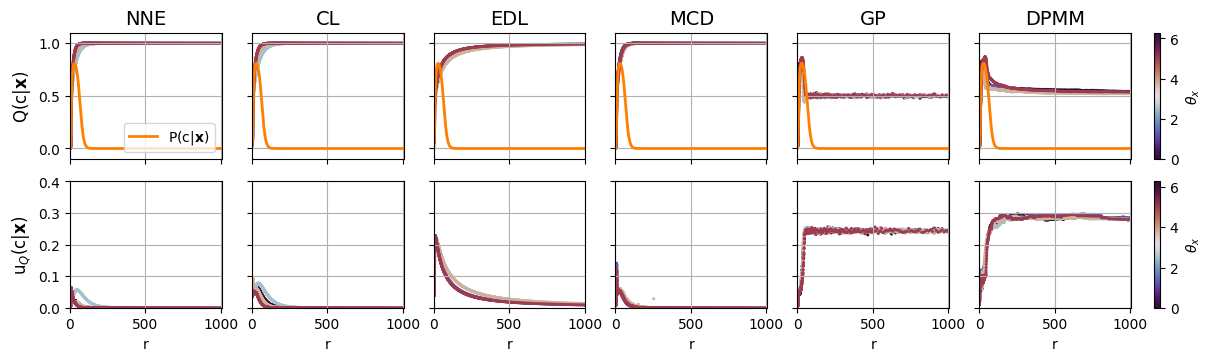

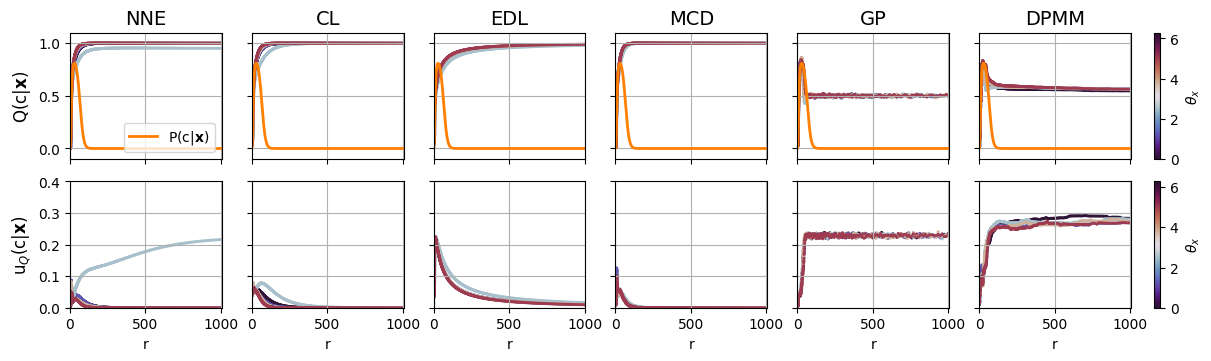

In [28]:
r_plots(large_grid_dfs_A, large_grid_data_A, large_grid_rmax_A, shapes_A, scales_A, n_train, 
        color_palette="twilight_shifted", dataset_name="datasetA", grid=True)

In [ ]:
#r_plots(test_dfs_B, test_data_B, grid_xmax_B, shapes_B, scales_B, color_palette="twilight_shifted", dataset_name="datasetB")

In [ ]:
def metric_plot(dfs_1, dfs_2, best_1, best_2, filename:str):
    #Also uses global variables
    metric_keys = ["ACC", "ROCAUC", "LogLoss", "Mean KL-div test", "ECE", "WD test", "Q-P dist", "Z", "Avg UE"]
    metric_labels = ["ACC", "ROCAUC", "LogLoss", "KL-div", "ECE", "WD", "Q-P dist",  "Z", "UE"]
    fig, axs = plt.subplots(nrows = len(metric_keys), ncols = n_models, figsize = (2*n_models,1.7*len(metric_keys)), layout="constrained", sharex=True, sharey="row")
    for i in range(n_models):
        axs[0][i].set_title(model_names[i], fontsize=14)
        for j in range(len(metric_keys)):
            axs[j][i].plot(dfs_1[i]["N data"], dfs_1[i][f"{metric_keys[j]}"], c="#ff7f00", label="A") #orange
            axs[j][i].plot(dfs_2[i]["N data"], dfs_2[i][f"{metric_keys[j]}"], c="#377eb8", label="B") #blue
            #axs[0][i].set_ylim(0.6, 0.8)
            
    for col in axs[-1]:
        col.set_xlabel(r"N$_{\text{train}}$")

    for ax in axs.flatten():
        ax.set_xscale("log")
    
    axs[0][0].legend(loc="lower right")

    for j in range(len(metric_keys)):
        key = metric_keys[j]
        axs[j][0].set_ylabel(f"{metric_labels[j]}", fontsize=14)
        #Mark best model
        if (j < (len(metric_keys)-1)):
            for n in range(n_plots):
                best_model_1 = int(best_1[metric_keys[j]][n])
                axs[j, best_model_1].scatter(x=[n_train[n]], y=[dfs_1[best_model_1][key][n]], marker='*', s=15, c="red")
                best_model_2 = int(best_2[metric_keys[j]][n])
                axs[j, best_model_2].scatter(x=[n_train[n]], y=[dfs_2[best_model_2][key][n]], marker='o', s=15, c="red")

    #fig.savefig(f"fig/{filename}.pdf", format="pdf", bbox_inches='tight', dpi=350)

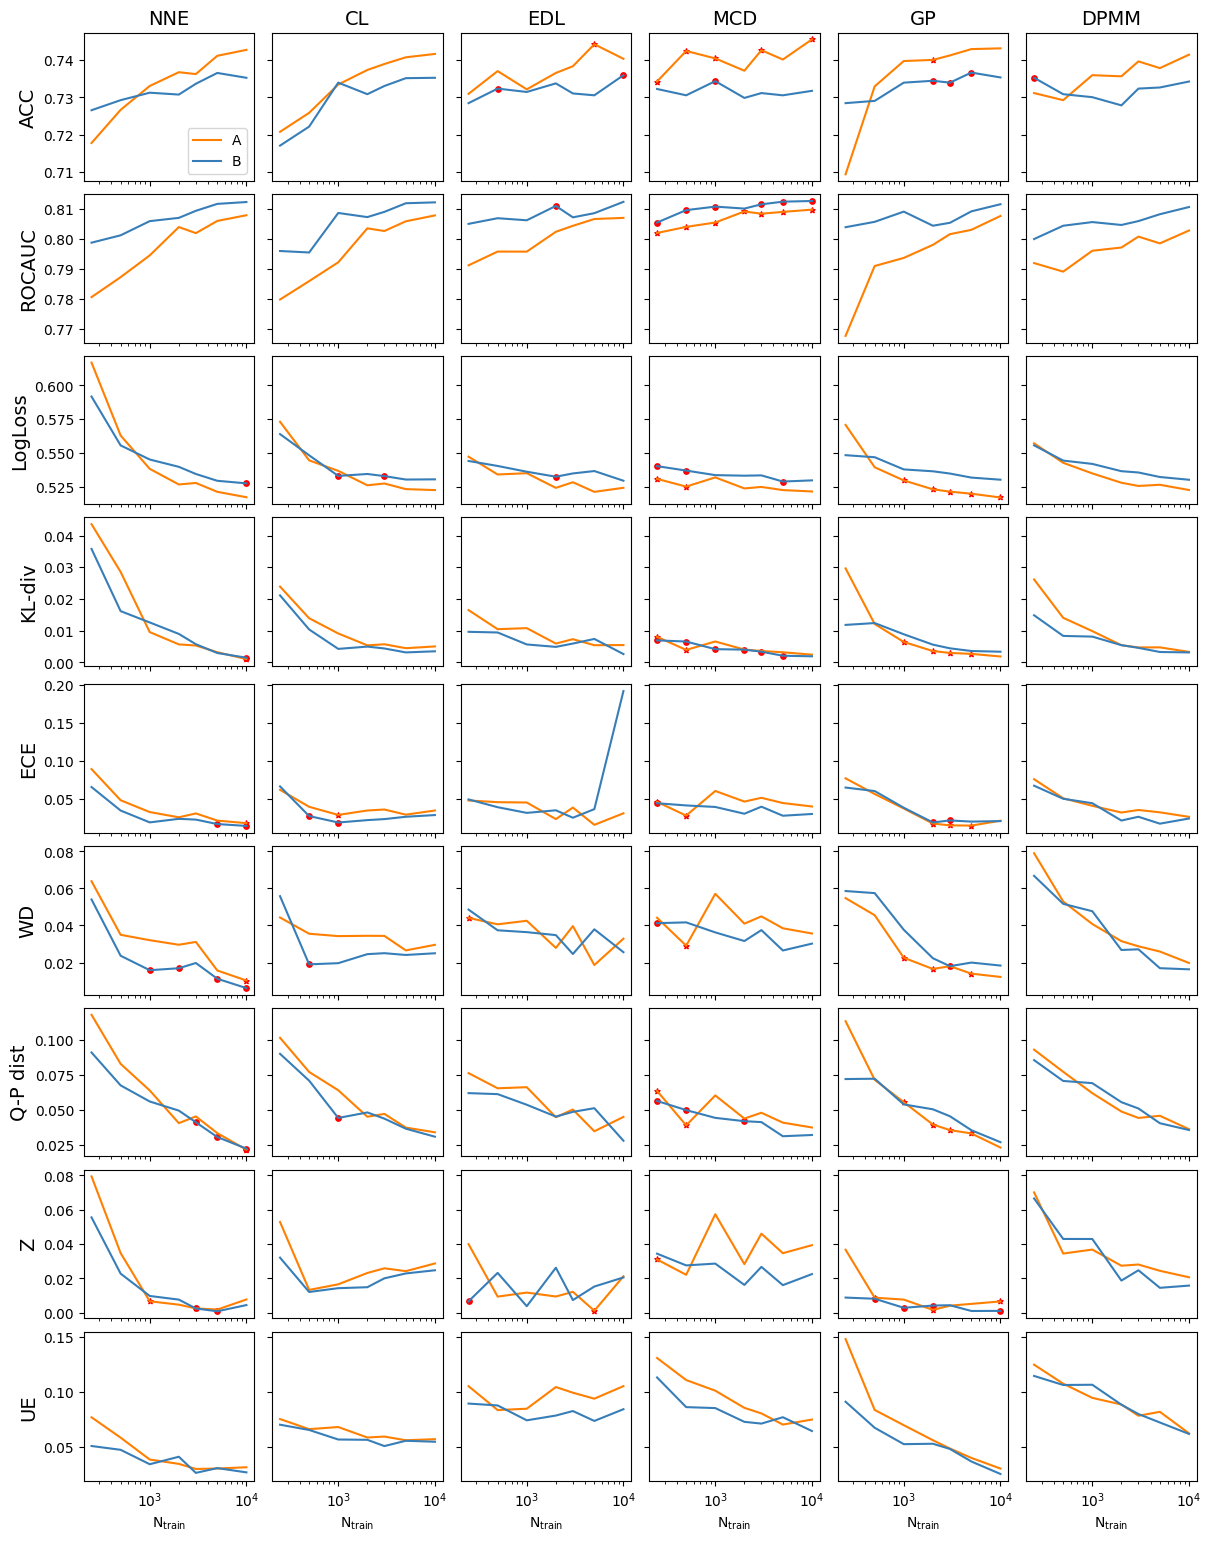

In [ ]:
#metric_plot(scores_A, scores_B, best_score_A, best_score_B, "results_datasetAB_metrics")

In [33]:
def metric_plot_v2(dfs, max_acc, filename:str):
    #Also uses global variables
    metric_keys = ["ACC", "ECE", "LogLoss", 
                   "Z", "WD test", "Mean KL-div test"]
    metric_labels = ["ACC", "ECE", "LogLoss",
                     "Z", "WD", "KL-div"]
    fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 5.5), layout="constrained", sharex=True)
    #Accuracy plot
    x = [0, n_train[-1]]
    y = [max_acc, max_acc]
    axs[0][0].plot(x, y, linestyle="--", label=f"Opt ACC={'{0:0.3}'.format(max_acc)}", color="black")
    axs[0][0].legend()
    for i in range(len(metric_keys)):
        ax = axs.flatten()[i]
        #ax.set_title(metric_labels[i], fontsize=14)
        for j in range(n_models):
            ax.plot(dfs[j]["N data"], dfs[j][f"{metric_keys[i]}"], label=model_names[j])
            #axs[0][i].set_ylim(0.6, 0.8)
        ax.set_ylabel(f"{metric_labels[i]}", fontsize=14)
        
    
    #axs[0][0].legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=6)
    handles, labels = axs[-1][-1].get_legend_handles_labels()
    fig.suptitle("    ", fontsize=26)
    fig.legend(handles, labels, loc='upper center', ncol=6, labelspacing=0., fontsize=14)

    #Set equal axes for Z, ECE & WD
    axs[1][0].set_ylim(0, 0.1)
    axs[0][1].set_ylim(0, 0.1)
    axs[1][1].set_ylim(0, 0.1)
    
    #Set axes for ACC
    axs[0][0].set_ylim(0.70, 0.75)

    for ax in axs.flatten():
        ax.set_xscale("log")
        ax.set_xlim(n_train[0], n_train[-1])

    for ax in axs[1]:
        ax.set_xlabel(r"N$_{\text{train}}$", fontsize=14)
        
    fig.savefig(f"fig/{filename}.pdf", format="pdf", bbox_inches='tight', dpi=350)
    fig.savefig(f"fig/{filename}.png", format="png", bbox_inches='tight', dpi=350)

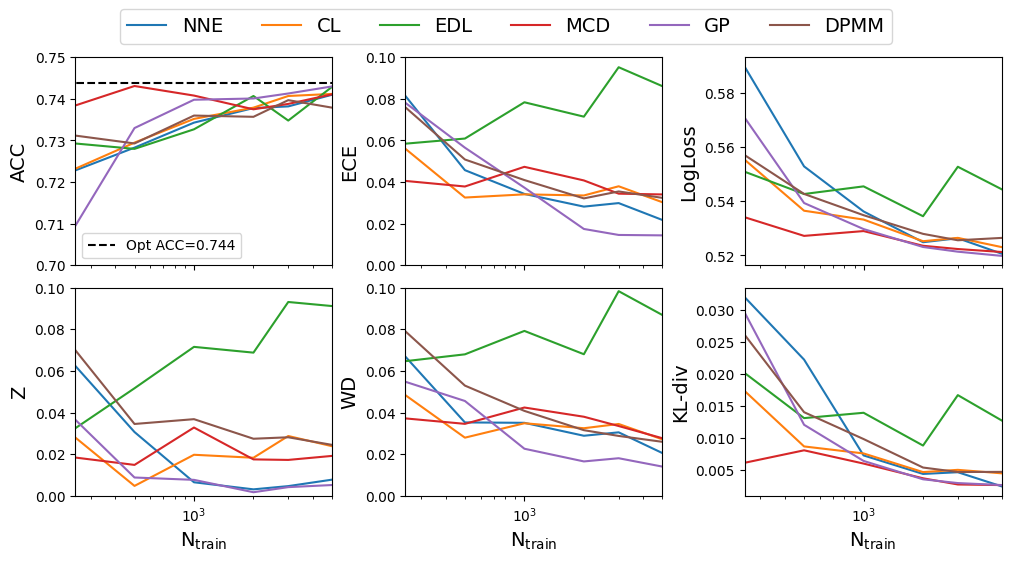

In [34]:
metric_plot_v2(scores_A, max_acc_A, filename="metric_plots_datasetA")
#metric_plot_v2(scores_B, max_acc_B, filename="metric_plots_datasetB")

## Smaller test set

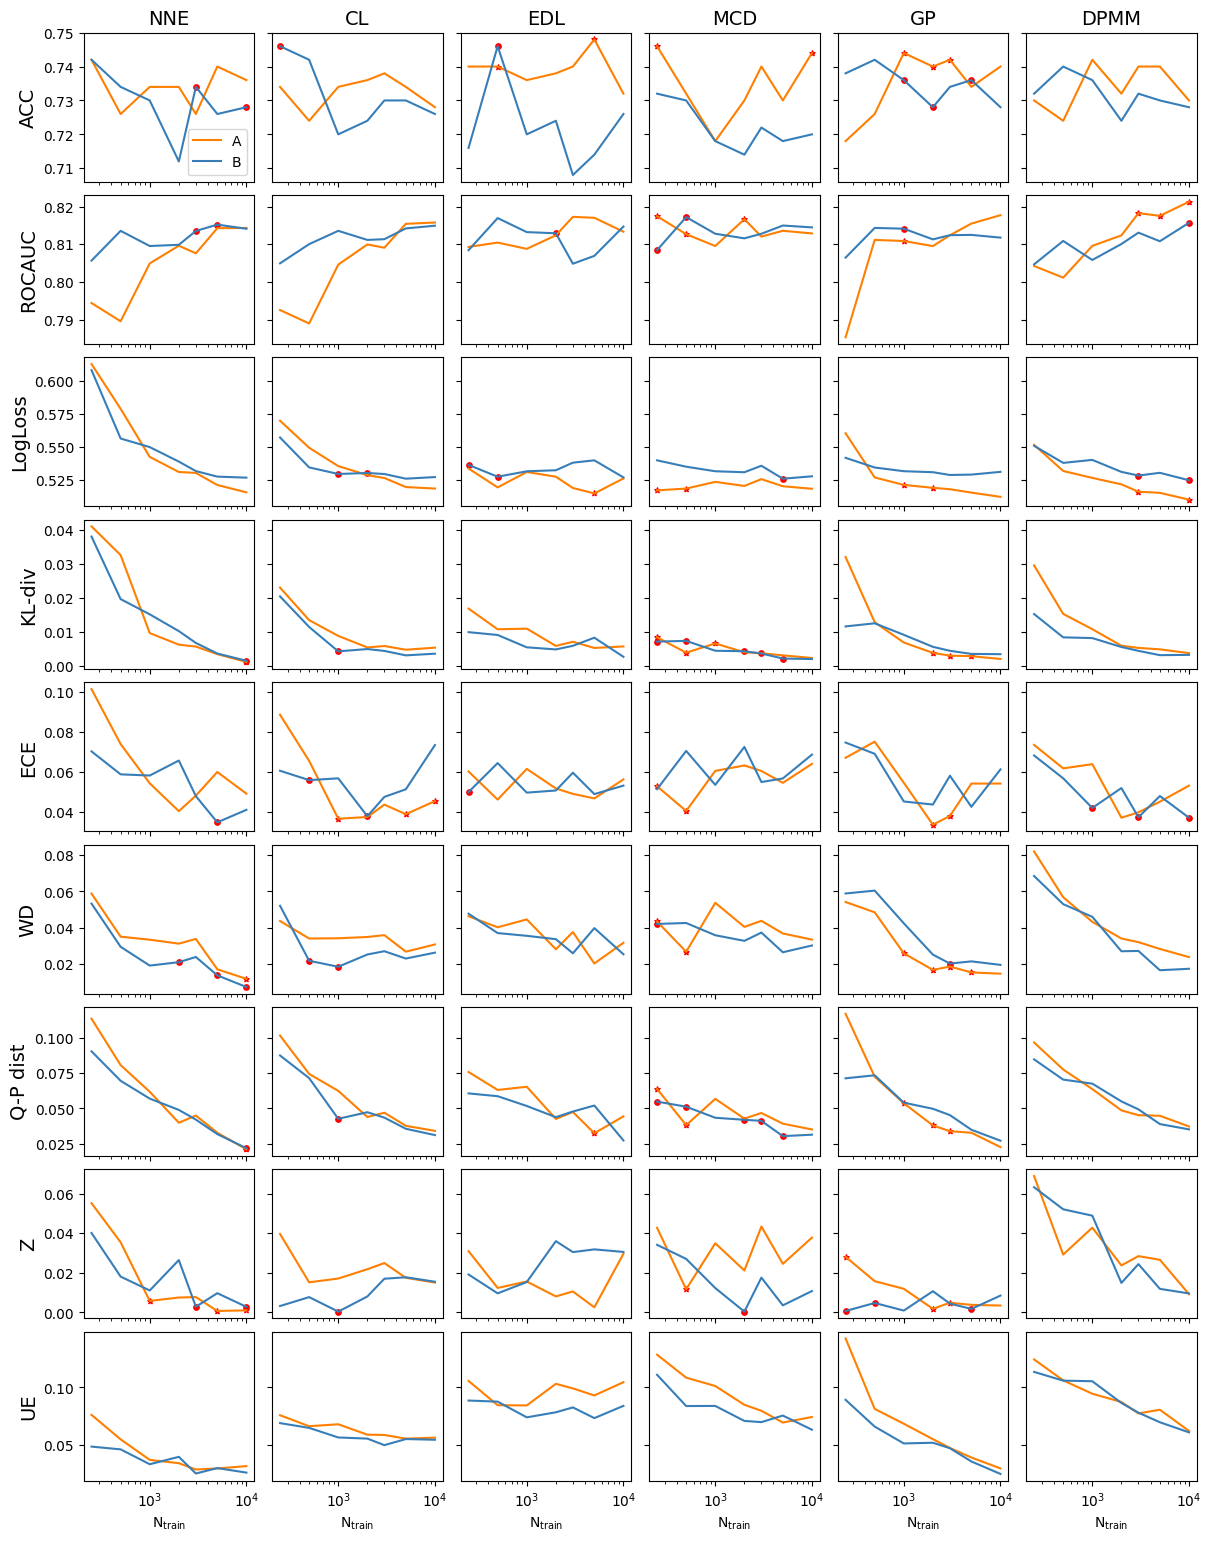

In [ ]:
#metric_plot(scores_A_small, scores_B_small, best_score_A_small, best_score_B_small, "results_datasetAB_small_metrics")

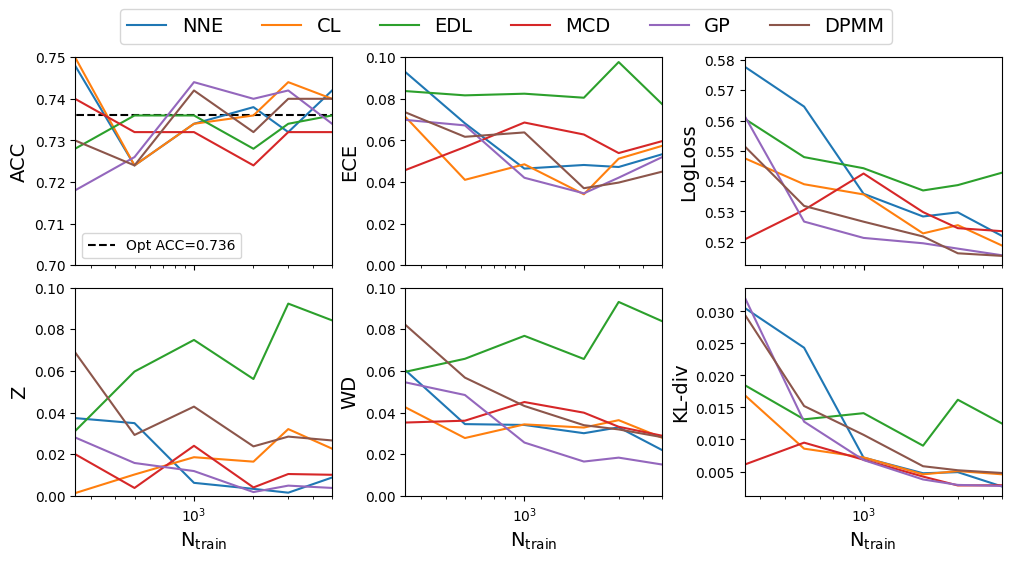

In [35]:
metric_plot_v2(scores_A_small, max_acc_A_small, filename="metric_plots_datasetA_small")
#metric_plot_v2(scores_B_small, max_acc_B_small, filename="metric_plots_datasetB_small")

In [36]:
def uncertainties_plot(dfs, filename:str):
    #Also uses global variables
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (5, 4), layout="constrained")

    #ax.set_title(metric_labels[i], fontsize=14)
    for j in range(n_models):
        ax.plot(dfs[j]["N data"], dfs[j][f"Avg UE"], label=model_names[j])
        #axs[0][i].set_ylim(0.6, 0.8)
    ax.set_ylabel(r"Average uncertainty", fontsize=14)
    ax.legend()
    ax.set_xlabel(r"N$_{\text{train}}$", fontsize=14)
    ax.tick_params(labelsize=12)
    ax.set_xscale("log")
    ax.set_xlim(n_train[0], n_train[-1])
    
    fig.savefig(f"fig/{filename}.pdf", format="pdf", bbox_inches='tight', dpi=350)
    fig.savefig(f"fig/{filename}.png", format="png", bbox_inches='tight', dpi=350)

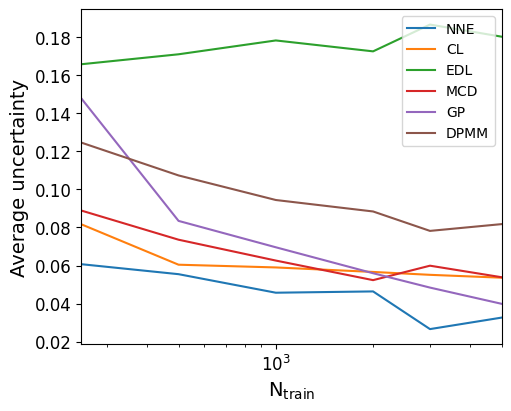

In [38]:
uncertainties_plot(scores_A, filename="uncertainties_datasetA")
#uncertainties_plot(scores_B, filename="uncertainties_datasetB")

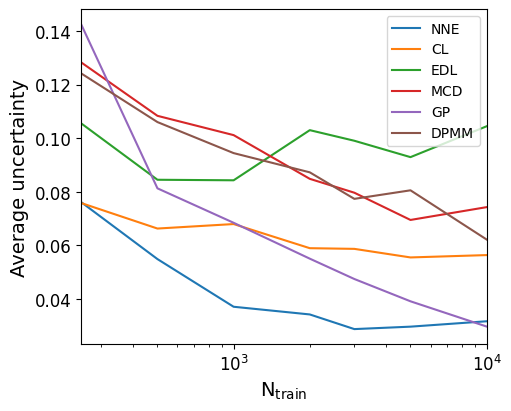

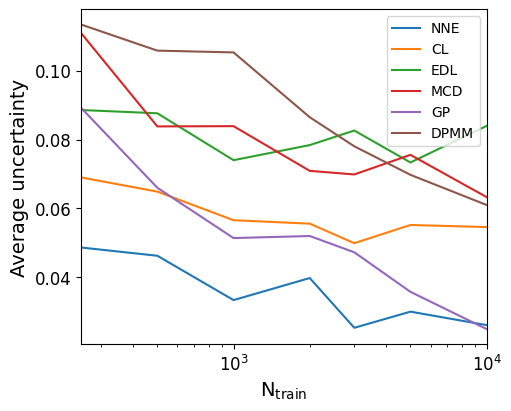

In [ ]:
uncertainties_plot(scores_A_small, filename="uncertainties_datasetA_small")
uncertainties_plot(scores_B_small, filename="uncertainties_datasetB_small")